In [25]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
from tensorflow.keras.models import Sequential

In [4]:

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228813984/228813984 [==============================] - 201s 1us/step


In [5]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


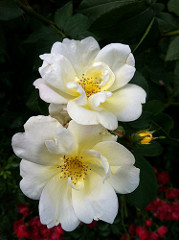

In [7]:
rose = list(data_dir.glob('roses/*'))
PIL.Image.open(str(rose[0]))

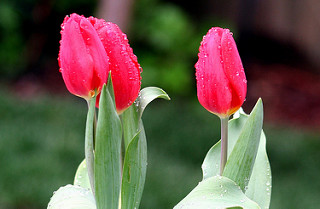

In [8]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [9]:
flower_images_dict = {'roses': list(data_dir.glob('roses/*')),
                      'daisy': list(data_dir.glob('daisy/*')),
                      'dandelion': list(data_dir.glob('dandelion/*')),
                      'sunflowers': list(data_dir.glob('sunflowers/*')),
                      'tulips': list(data_dir.glob('tulips/*'))
}

In [11]:
flower_images_dict.keys()

dict_keys(['roses', 'daisy', 'dandelion', 'sunflowers', 'tulips'])

In [12]:
flower_labels_dict = {'roses': 0,
                      'daisy': 1, 
                        'dandelion': 2,
                        'sunflowers': 3,
                        'tulips': 4
}

In [14]:
img=cv2.imread(str(rose[0]))

In [15]:
resize_img=cv2.resize(img,(180,180))
resize_img.shape

(180, 180, 3)

In [17]:
X,y=[],[]

for flower_name, images in flower_images_dict.items():
    for i in images:
        img=cv2.imread(str(i))
        resize_img=cv2.resize(img,(180,180))
        X.append(resize_img)
        y.append(flower_labels_dict[flower_name])
        


In [19]:
X=np.array(X)
y=np.array(y)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2752, 180, 180, 3), (918, 180, 180, 3), (2752,), (918,))

In [22]:
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

In [26]:
cnn=models.Sequential([
    layers.Conv2D(16,(3,3),activation='relu',input_shape=(180,180,3)),
    layers.MaxPooling2D(2,2),
    
    layers.Conv2D(32,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(5,activation='softmax')
])
cnn.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

cnn.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
86/86 [==============================] - 77s 878ms/step - loss: 1.3676 - accuracy: 0.4186
Epoch 2/10
86/86 [==============================] - 65s 755ms/step - loss: 1.0196 - accuracy: 0.5977
Epoch 3/10
86/86 [==============================] - 66s 771ms/step - loss: 0.8589 - accuracy: 0.6715
Epoch 4/10
86/86 [==============================] - 59s 693ms/step - loss: 0.6747 - accuracy: 0.7427
Epoch 5/10
86/86 [==============================] - 58s 677ms/step - loss: 0.4707 - accuracy: 0.8339
Epoch 6/10
86/86 [==============================] - 59s 688ms/step - loss: 0.2643 - accuracy: 0.9139
Epoch 7/10
86/86 [==============================] - 58s 676ms/step - loss: 0.1578 - accuracy: 0.9520
Epoch 8/10
86/86 [==============================] - 67s 778ms/step - loss: 0.0812 - accuracy: 0.9815
Epoch 9/10
86/86 [==============================] - 74s 868ms/step - loss: 0.0519 - accuracy: 0.9873
Epoch 10/10
86/86 [==============================] - 70s 821ms/step - loss: 0.0506 - accura

In [30]:
cnn.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 11s 347ms/step - loss: 2.1157 - accuracy: 0.6264


[2.1156888008117676, 0.6263616681098938]

In [33]:
y_pred=cnn.predict(X_test_scaled)

29/29 [==============================] - 7s 229ms/step


In [34]:
y_pred

array([[2.9527696e-02, 3.2076841e-07, 2.2448707e-07, 2.0171437e-02,
        9.5030034e-01],
       [9.1268213e-08, 1.1298239e-09, 5.6266570e-01, 4.1630930e-01,
        2.1024920e-02],
       [1.2146804e-02, 4.2088041e-03, 8.0062775e-05, 5.1530480e-01,
        4.6825945e-01],
       ...,
       [6.6579906e-07, 2.5582156e-07, 4.5540645e-08, 9.9997008e-01,
        2.8911685e-05],
       [1.8443614e-05, 3.6064616e-09, 1.3737270e-02, 9.7750014e-01,
        8.7442147e-03],
       [1.0035572e-05, 9.9134773e-01, 2.1510145e-03, 6.4621456e-03,
        2.9017212e-05]], dtype=float32)

In [35]:
y_predicted=[np.argmax(i) for i in y_pred]

In [31]:
from sklearn.metrics import classification_report,confusion_matrix

In [36]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.73      0.24      0.37       181
           1       0.68      0.60      0.64       159
           2       0.63      0.85      0.72       221
           3       0.73      0.64      0.68       170
           4       0.52      0.75      0.61       187

    accuracy                           0.63       918
   macro avg       0.66      0.62      0.60       918
weighted avg       0.65      0.63      0.61       918



Using Data-agumentation

In [44]:
data_augmentation=keras.Sequential(
    [
        layers.RandomFlip("horizontal_and_vertical"),
        layers.RandomRotation(0.2),
        layers.RandomZoom(0.4),
    ]
)


In [45]:
X_test_scaled[0]

array([[[0.15294118, 0.10980392, 0.09411765],
        [0.14901961, 0.09411765, 0.09019608],
        [0.07843137, 0.08627451, 0.11372549],
        ...,
        [0.16862745, 0.18039216, 0.19607843],
        [0.16470588, 0.17647059, 0.19215686],
        [0.16862745, 0.18431373, 0.19607843]],

       [[0.15294118, 0.12941176, 0.1254902 ],
        [0.17254902, 0.12941176, 0.12941176],
        [0.12941176, 0.12156863, 0.1254902 ],
        ...,
        [0.20392157, 0.22352941, 0.23921569],
        [0.19607843, 0.21568627, 0.23137255],
        [0.19215686, 0.21568627, 0.23137255]],

       [[0.14901961, 0.1372549 , 0.11764706],
        [0.17254902, 0.13333333, 0.1254902 ],
        [0.1254902 , 0.10196078, 0.08627451],
        ...,
        [0.20392157, 0.23529412, 0.25098039],
        [0.18823529, 0.22352941, 0.23921569],
        [0.19215686, 0.22352941, 0.23921569]],

       ...,

       [[0.24313725, 0.2745098 , 0.54901961],
        [0.24313725, 0.2745098 , 0.53333333],
        [0.29411765, 0

In [47]:
cnn2=models.Sequential([
    data_augmentation,
    layers.Conv2D(16,(3,3),padding='same',activation='relu',input_shape=(180,180,3)),
    layers.MaxPooling2D(2,2),
    
    layers.Conv2D(32,(3,3),padding='same',activation='relu'),
    layers.MaxPooling2D(2,2),
    
    layers.Conv2D(64,(3,3),padding='same',activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.2),
    
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(5,activation='softmax')
])
cnn2.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

cnn2.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
86/86 [==============================] - 97s 990ms/step - loss: 1.4485 - accuracy: 0.3616
Epoch 2/50
86/86 [==============================] - 82s 957ms/step - loss: 1.1435 - accuracy: 0.5062
Epoch 3/50
86/86 [==============================] - 79s 915ms/step - loss: 1.0303 - accuracy: 0.5872
Epoch 4/50
86/86 [==============================] - 73s 853ms/step - loss: 0.9701 - accuracy: 0.6134
Epoch 5/50
86/86 [==============================] - 77s 897ms/step - loss: 0.9106 - accuracy: 0.6366
Epoch 6/50
86/86 [==============================] - 65s 746ms/step - loss: 0.8942 - accuracy: 0.6374
Epoch 7/50
86/86 [==============================] - 59s 682ms/step - loss: 0.8299 - accuracy: 0.6759
Epoch 8/50
86/86 [==============================] - 58s 669ms/step - loss: 0.8108 - accuracy: 0.6799
Epoch 9/50
86/86 [==============================] - 62s 724ms/step - loss: 0.8014 - accuracy: 0.6850
Epoch 10/50
86/86 [==============================] - 55s 643ms/step - loss: 0.7648 - accura

In [49]:
cnn2.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 4s 132ms/step - loss: 0.9081 - accuracy: 0.7407


[0.9080671072006226, 0.7407407164573669]

In [70]:
y_pred=cnn2.predict(X_test_scaled)

29/29 [==============================] - 6s 180ms/step


In [71]:
y_predicted=[np.argmax(i) for i in y_pred]

In [72]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.65      0.69      0.67       181
           1       0.79      0.81      0.80       159
           2       0.82      0.79      0.80       221
           3       0.87      0.76      0.81       170
           4       0.61      0.66      0.63       187

    accuracy                           0.74       918
   macro avg       0.75      0.74      0.74       918
weighted avg       0.75      0.74      0.74       918



In [60]:
import seaborn as sns

<Axes: >

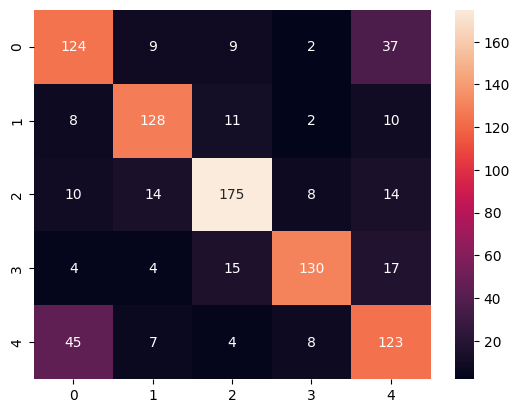

In [73]:
sns.heatmap(confusion_matrix(y_test, y_predicted),annot=True,fmt='d')

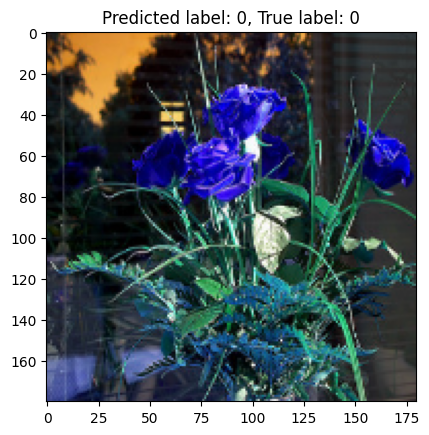

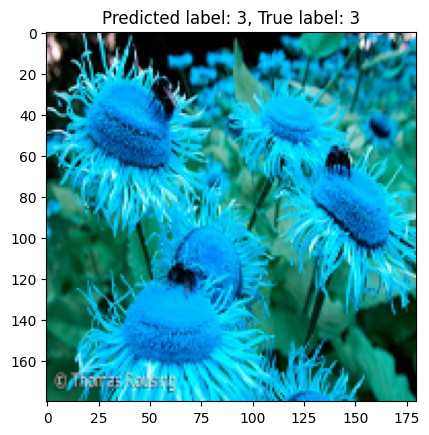

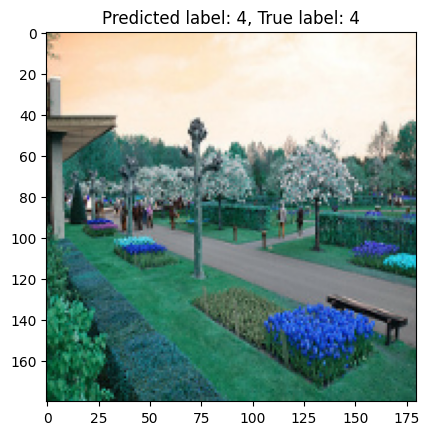

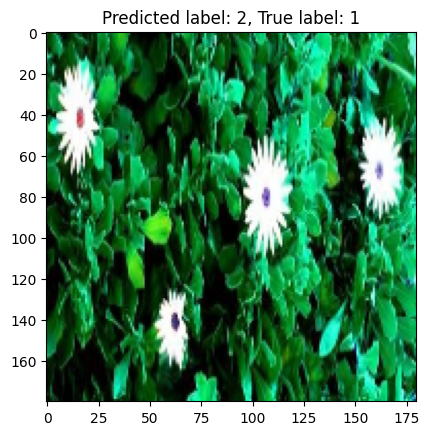

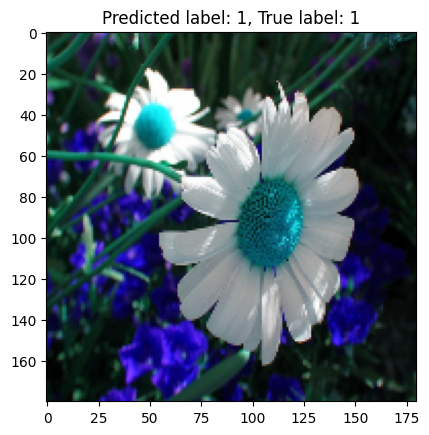

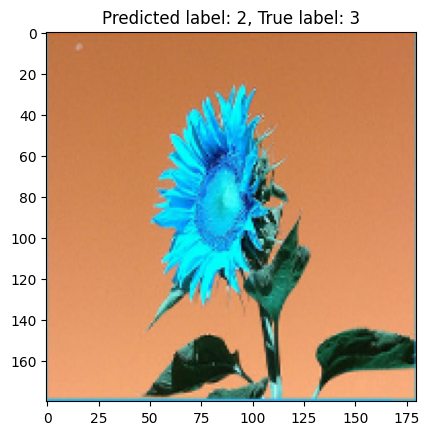

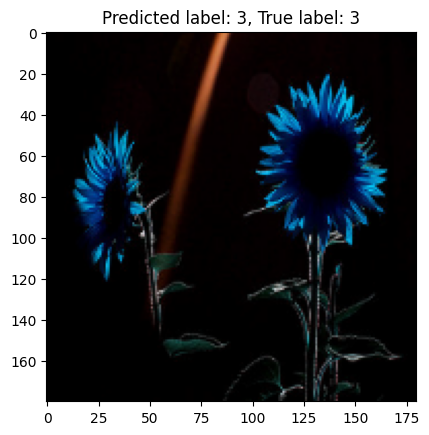

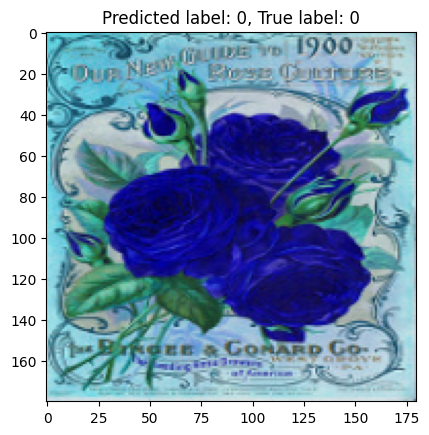

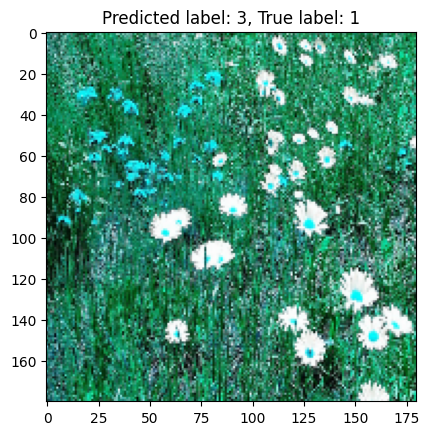

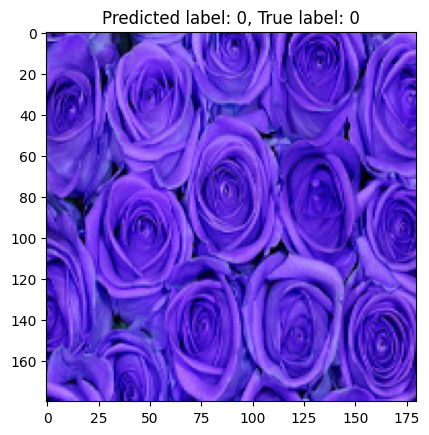

In [74]:
for i in range(10):
    plt.imshow(X_test[i])
    plt.title(f"Predicted label: {y_predicted[i]}, True label: {y_test[i]}")
    plt.show()


In [68]:
y_predicted[-10:]

[2, 4, 4, 1, 4, 4, 2, 3, 3, 1]